Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Arguments

rate: float between 0 and 1. Fraction of the input units to drop.
noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).
seed: A Python integer to use as random seed.

Dense network, Cross Entropy Function, ReLu activation,  with 1 hidden layer.
Start from here to improve the model in later iterations
3 layers:
- first hiden layer : 64 units, ReLu
- second hiden layer : 64 units, ReLu
- Output: 10 units, softmax
- Learning rate : 0.1 
- loss = cross entropy
- Glorot Weight Initialization is the Keras default
- In this experiment, I use explicitly glorot_normal and biais to zeros (Keras default)
- batch Normalization
 
 Adding Dropout

Results:
loss: 0.0153 - accuracy: 0.9960 - val_loss: 0.0792 - val_accuracy: 0.9771 (without dropout)
loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0884 - val_accuracy: 0.9781
val accuracy improved slightly `from 0.9771 to 0.9781

rate used is 0.2 : 20 % of last hiden layer dropped

Import packages

In [15]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

#Batch Norm
from tensorflow.keras.layers import BatchNormalization

# import regularizer
from tensorflow.keras import regularizers  

#Dropout
from tensorflow.keras.layers import Dropout

Some verifications

In [16]:
#TF
print(np.random.uniform())

0.025505748191291033


Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [17]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


In [18]:
print(x_train.shape)


(60000, 28, 28)


In [19]:
print(y_train.shape)

(60000,)


In [20]:
print(x_train[0].shape)

(28, 28)


In [21]:
print(y_train)
print(y_train.size)

[5 0 4 ... 5 6 8]
60000


In [22]:
print(x_valid.shape)
print(y_valid.shape)

(10000, 28, 28)
(10000,)


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [23]:
#use numpy reshape
x_train = np.reshape(x_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(x_valid, (10000, 28 * 28)).astype('float32')

In [24]:
print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [25]:
#print(x_train)
x_train /=  255
x_valid /=  255

Prepare labels (y_train and y_valid)
y_train[i] is given as a number (0, 9). We have 10 possible values. 
Convert to one-hot format:
0 => [1, 0, 0, 0, 0,0, 0,0, 0,0]
1 => [0, 1, 0, 0, 0,0, 0,0, 0,0]
9 => [0, 0, 0, 0, 0,0, 0,0, 0,1]

In [26]:
n_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, n_classes)
print(y_train[0])

print(y_valid[0])
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_valid[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [27]:
#Define activations
activation = keras.activations.relu
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
tf.print(sgd.lr)


0.1


In [36]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [37]:
from tensorflow.keras.layers import Activation
#define First layer
inputSize = 28 * 28 # size of input vector
nbUnits = 64 #Number of input layer units (artificial neuron)
kernel_initializer='glorot_normal'
bias_initializer='zeros'

 
#use_bias = false => Not necessary eith batch Norm
firstLayer = Dense(nbUnits,   input_shape=(inputSize,))
model.add(firstLayer)
model.add(BatchNormalization())
model.add(Activation(activation))
 
secondlayer = Dense(nbUnits)
model.add(secondlayer)
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.2))

In [38]:
#define Output layer
 
outputUnits = 10 #Number of output layer units (artificial neuron)
# output shape will be inferred
outputLayer = Dense(outputUnits, activation=  softmax)
model.add(outputLayer)

In [39]:
#print Batch Norm
tf.print(model.layers[1].axis) 

ListWrapper([1])


In [40]:
#compile Model
model.compile(loss=loss, 
         optimizer=sgd,
         metrics=['accuracy'])

In [41]:
# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

TensorBoard

In [42]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
folder="logs/Dropout"
if not os.path.exists(folder):
   os.mkdir(folder)
log_dir = folder + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/Dropout/20200301-124259


In [44]:
# Train
batch_size = 128
nb_epoch = 50
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.0789 - val_accuracy: 0.9754
Epoch 2/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0763 - val_accuracy: 0.9761
Epoch 3/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0786 - val_accuracy: 0.9753
Epoch 5/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0781 - val_accuracy: 0.9773
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 7/50
60000/60000 [==============================] 

Save Model

In [118]:
# serialize model to JSON
print(log_dir)
model_json = model.to_json()
with open(log_dir + "/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save(log_dir + "/model_all.h5")

logs/crossEntropyReLu2LayersWIBN/20200301-114953


Plot History

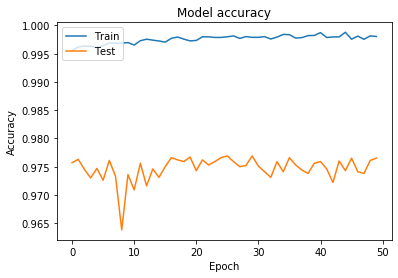

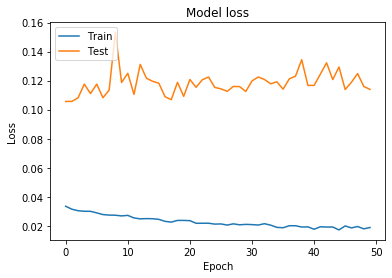

In [119]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [115]:
# summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                50176     
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
activation_18 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4096      
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [116]:
json = model.to_json()
tf.print(json)

{"class_name": "Sequential", "config": {"name": "sequential_10", "layers": [{"class_name": "Dense", "config": {"name": "dense_26", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1L2", "config": {"l1": 0.0, "l2": 9.999999747378752e-05}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_18", "trainable": true, "dtype": "float32", "axis": [1], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {}}, "gamma_initializer": {"class_name": "Ones", "config": {}}, "moving_mean_initializer": {"class_name": "Zeros", "config": {}}, "moving

End